# Brief and applicable


For Supervised
Input (x), Output(y)
- Example: In credit scoring, the input features might include:
     - `x1`: Age
     - `x2`: Income
     - `x3`: Credit history

Outputs (y): Credit score (numeric)


#### Dataset Example:
| Age (x1) | Income (x2) | Credit History (x3) | Credit Score (y) |
|----------|-------------|---------------------|------------------|
| 25       | 50,000      | 700                 | 750              |
| 40       | 80,000      | 680                 | 720              |
| 30       | 60,000      | 650                 | 680              |
| 50       | 100,000     | 720                 | 780              |

For UnSupervised
Example: Market Basket Analysis
which products are frequently bought together

#### Inputs (x):
- Each transaction consists of a list of products purchased together.

#### Dataset Example:
| Transaction ID | Products Purchased             |
|----------------|--------------------------------|
| Trans1         | Bread, Butter, Milk            |
| Trans2         | Bread, Butter                  |
| Trans3         | Milk, Diapers, Beer, Eggs      |
| Trans4         | Bread, Milk, Diapers, Beer     |
| Trans5         | Bread, Milk, Diapers, Butter   |


_**Convert it to a numeric format for computer processing.**_

| Transaction ID | Bread | Butter | Milk | Diapers | Beer |
|----------------|-------|--------|------|---------|------|
| Trans1         | 1     | 1      | 1    | 0       | 0    |
| Trans2         | 1     | 1      | 0    | 0       | 0    |
| Trans3         | 0     | 0      | 1    | 1       | 1    |
| Trans4         | 1     | 0      | 1    | 1       | 1    |
| Trans5         | 1     | 1      | 1    | 1       | 0    |

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Create the dataset with additional transactions
data = {
    'Transaction ID': ['Trans1', 'Trans2', 'Trans3', 'Trans4', 'Trans5', 'Trans6', 'Trans7', 'Trans8', 'Trans9', 'Trans10'],
    'Bread': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
    'Butter': [1, 1, 0, 0, 1, 1, 0, 1, 1, 0],
    'Milk': [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    'Diapers': [0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
    'Beer': [0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Transaction ID', inplace=True)

print("Original Data:")
print(df)

# Apply K-Means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df)

print("\nData with Clusters:")
print(df)


Original Data:
                Bread  Butter  Milk  Diapers  Beer
Transaction ID                                    
Trans1              1       1     1        0     0
Trans2              1       1     0        0     0
Trans3              0       0     1        1     1
Trans4              1       0     1        1     1
Trans5              1       1     1        1     0
Trans6              0       1     0        1     0
Trans7              1       0     1        1     0
Trans8              1       1     1        0     1
Trans9              0       1     0        1     1
Trans10             0       0     1        0     1

Data with Clusters:
                Bread  Butter  Milk  Diapers  Beer  Cluster
Transaction ID                                             
Trans1              1       1     1        0     0        2
Trans2              1       1     0        0     0        0
Trans3              0       0     1        1     1        1
Trans4              1       0     1        1     1  

## Simple Word2Vec Example with Gensim
**Word2Vec** is a deep learning algorithm that generates _vector representations_ of words by training on a large corpus of text, capturing semantic similarities based on the context in which words appear.
***Word2Vec is a powerful feature extractor for natural language processing tasks***

For the Persian language, you can read this site. It explains [word2vec](https://data-hub.ir/%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85-word2vec-%DA%86%DB%8C%D8%B3%D8%AA/) in Farsi.


### **Example Sentence:**
"In nature, flowers bloom beautifully, adding color and joy to the peaceful surroundings of the outdoors."

### **Sliding Window Size: 3**
We will extract examples where each target word is predicted based on its surrounding context words.

### **Training Data Table**

| Target Word | Context Words (Input)                     | Example Input (`x`)         | Example Output (`y`) |
|-------------|-------------------------------------------|-----------------------------|-----------------------|
| flowers     | In, nature                                | ["In", "nature"]            | flowers               |
| flowers     | nature, bloom                             | ["nature", "bloom"]         | flowers               |
| bloom       | nature, flowers                           | ["nature", "flowers"]       | bloom                 |
| bloom       | flowers, beautifully                      | ["flowers", "beautifully"]  | bloom                 |
| beautifully | flowers, bloom                            | ["flowers", "bloom"]        | beautifully           |
| beautifully | bloom, adding                             | ["bloom", "adding"]         | beautifully           |
| adding      | bloom, beautifully                        | ["bloom", "beautifully"]    | adding                |
| adding      | beautifully, color                         | ["beautifully", "color"]    | adding                |
| color       | beautifully, adding                       | ["beautifully", "adding"]   | color                 |
| color       | adding, and                               | ["adding", "and"]           | color                 |
| and         | adding, color                             | ["adding", "color"]         | and                   |
| and         | color, joy                                | ["color", "joy"]            | and                   |
| joy          | color, and                                | ["color", "and"]            | joy                   |
| joy          | and, to                                   | ["and", "to"]               | joy                   |
| to           | and, joy                                  | ["and", "joy"]              | to                    |
| to           | joy, the                                  | ["joy", "the"]              | to                    |
| the          | joy, to                                   | ["joy", "to"]               | the                   |
| the          | to, peaceful                              | ["to", "peaceful"]          | the                   |
| peaceful     | to, the                                   | ["to", "the"]               | peaceful              |
| peaceful     | the, surroundings                         | ["the", "surroundings"]     | peaceful              |
| surroundings | the, peaceful                             | ["the", "peaceful"]         | surroundings           |
| surroundings | peaceful, of                              | ["peaceful", "of"]          | surroundings           |
| of           | peaceful, surroundings                    | ["peaceful", "surroundings"]| of                    |
| of           | surroundings, the                         | ["surroundings", "the"]     | of                    |
| the          | surroundings, of                          | ["surroundings", "of"]      | the                   |
| the          | of, outdoors                              | ["of", "outdoors"]          | the                   |
| outdoors     | of, the                                   | ["of", "the"]               | outdoors              |

The input and output are fed into the model, and after the model is trained, the 'black box' can predict words related to the input word.

![BlackBox](../Introduction/IntroductionImages/BlackBox.JPG)


## Computer vision 
Computer Vision allows computers to "see" and understand images or videos. It involves techniques that enable machines to process, analyze, and make sense of visual data.

### Image Processing 
We started with image processing by looking at examples of digit recognition. First, what is a digit from the perspective of a camera? As shown below, each image we see is in the form of a matrix that affects the cells in our eyes. Similarly, a camera functions like an eye. The output of the camera is a matrix that looks as follows:

Data shape: (70000, 28, 28)
Labels shape: (70000,)
Shape of a single image: (28, 28)
Pixel values of the small part:
[[  1 154 253  90   0   0   0   0   0   0]
 [  0 139 253 190   2   0   0   0   0   0]
 [  0  11 190 253  70   0   0   0   0   0]
 [  0   0  35 241 225 160 108   1   0   0]
 [  0   0   0  81 240 253 253 119  25   0]
 [  0   0   0   0  45 186 253 253 150  27]
 [  0   0   0   0   0  16  93 252 253 187]
 [  0   0   0   0   0   0   0 249 253 249]
 [  0   0   0   0  46 130 183 253 253 207]
 [  0   0  39 148 229 253 253 253 250 182]]


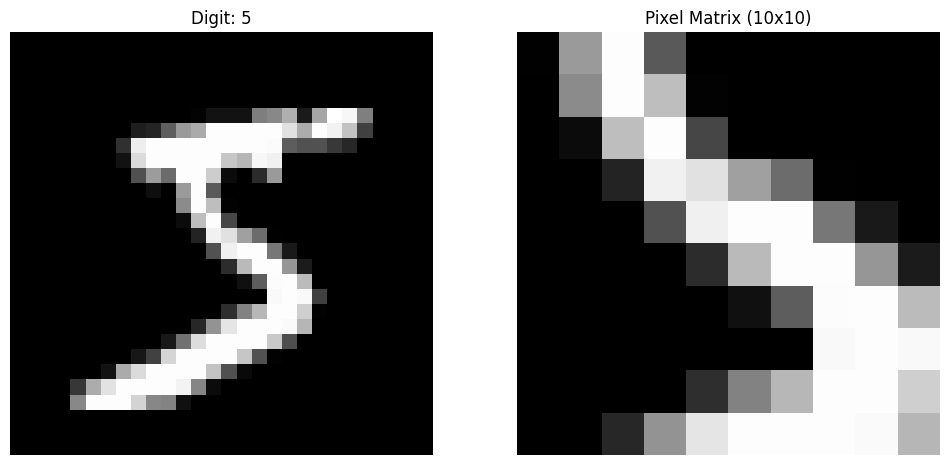

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset using scikit-learn
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data.to_numpy().reshape(-1, 28, 28)
labels = mnist.target.astype(int).to_numpy()

# Print the shapes of the datasets
print(f"Data shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Shape of a single image: {images[0].shape}")

# Function to display a small part of the image and its pixel matrix
def display_digit_and_matrix(image, label, top_left, size):
    # Extract the small part of the image
    top, left = top_left
    bottom = top + size
    right = left + size
    small_part = image[top:bottom, left:right]

    plt.figure(figsize=(12, 6))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')

    # Display the small part of the image
    plt.subplot(1, 2, 2)
    plt.imshow(small_part, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Pixel Matrix ({size}x{size})")
    plt.axis('off')
    
    # Print pixel values of the small part
    print("Pixel values of the small part:")
    print(small_part)
    
    plt.show()

# Define parameters for the small part of the image
top_left = (10, 10)  # Top-left corner of the small part
size = 10  # Size of the small part (10x10)

# Display the first image in the dataset with a small part
display_digit_and_matrix(images[0], labels[0], top_left, size)


We have 70,000 digit images, each of which is 28x28 pixels. We directly feed them to the learning module.

Accuracy: 0.55


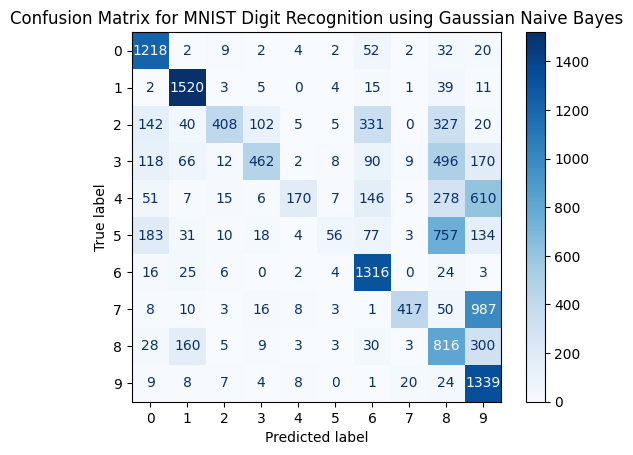

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data
labels = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST Digit Recognition using Gaussian Naive Bayes')
plt.show()


We see an accuracy of 0.55, or an error rate of 45%. This is a problem we must address by selecting suitable features and a machine learning model that yields better results.

With a change of model, we obtained 76% accuracy.

Accuracy: 0.76


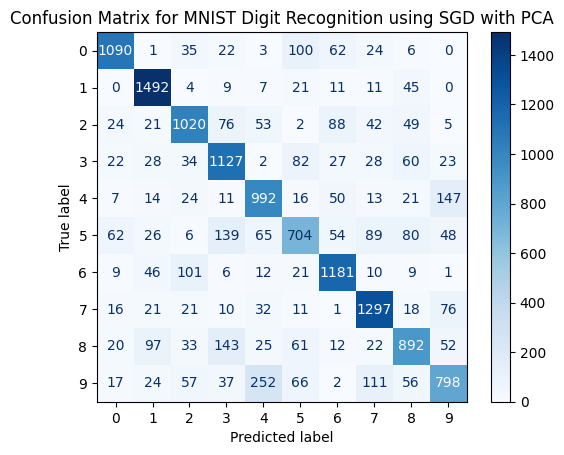

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data
labels = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Apply PCA for feature extraction
pca = PCA(n_components=10)  # Reduce to 10 components for faster computation
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Train the classifier
sgd.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = sgd.predict(X_test_pca)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sgd.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST Digit Recognition using SGD with PCA')
plt.show()
